<a href="https://colab.research.google.com/github/pearlyn-r/projects/blob/Data-Wrangling--ETL-Capstone/final_dw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping (E in ETL)** 

***Question:*** You are working for the NY Times and are assigned to find this years #1 Kindle,Paperback,Hardcover and Audiobook editions.

In [ ]:
import requests
url='https://www.amazon.in/gp/bestsellers/books/'
response = requests.get(url)
page_content=response.text
response.status_code

200

In [ ]:
page_content[0:500]

'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch"'

In [ ]:
from bs4 import BeautifulSoup
doc = BeautifulSoup(page_content, 'html.parser')
selection_class="_p13n-zg-nav-tree-all_style_zg-browse-item__1rdKf _p13n-zg-nav-tree-all_style_zg-browse-height-large__1z5B8"
books_title_tag=doc.find_all('div',{ 'class':selection_class})
books_url='https://www.amazon.in/gp/bestsellers/books/1318158031'
response=requests.get(books_url)
books_doc = BeautifulSoup(response.text, 'html.parser')
div_tags= books_doc.find_all('div',{'class':"zg-grid-general-faceout"})
#div_tags

In [ ]:
books_doc = BeautifulSoup(response.text, 'html.parser')
books_dict={
        'Book_Name':[],
        'Author_Name':[],
        'Book_URL':[],
        'Edition_Type':[],
        'Price':[],
        'Star_Rating':[],
        'Reviews':[]
    }    

def get_topic_page(books_urls):
    # download the page
    books_url='https://www.amazon.in/gp/bestsellers/books/1318158031'
    # check sucessful response
    response=requests.get(books_urls)
    
    if response.status_code!=200:
        raise Exception('failed to load page{}'.format(books_urls))
    # parse using BeautifulSoup
    topic_doc=BeautifulSoup(response.text, 'html.parser')
    div_tags= books_doc.find_all('div',{'class':"zg-grid-general-faceout"})
    return topic_doc


def books_details(div_tags):
    #extracting book names
    Book_Name_tags =div_tags.find('span')
    #extracting author name of books 
    Author_Name_tags = div_tags.find('a', class_ = 'a-size-small a-link-child')
    #extracting books urls
    Book_URL = 'https://amazon.in' + div_tags.find('a', class_ = 'a-link-normal')['href']
    #extracting edition type of books
    Edition_Type_tags = div_tags.find('span', class_ = 'a-size-small a-color-secondary a-text-normal')
    #extracting price tag of book 
    Price_tags = div_tags.find('span', class_ = 'p13n-sc-price')
    #extracting star rating of books
    Star_Rating_tags = div_tags.find('span', class_ = 'a-icon-alt')
    #extracting review of books
    Reviews_tags = div_tags.find('span', class_ = 'a-size-small')
    return Book_Name_tags, Author_Name_tags, Book_URL, Edition_Type_tags, Price_tags, Star_Rating_tags, Reviews_tags

def get_books(books_doc):
    div_selection_class = 'zg-grid-general-faceout'
    div_tags = books_doc.find_all('div', class_ = div_selection_class ) # creating a dictionary   
    for i in range(0, len(div_tags)):
        books_info = books_details(div_tags[i])
        book_name(books_info)
        author_name(books_info)
        book_url(books_info)
        edition_type(books_info)
        book_price(books_info)
        star_rating(books_info)
        book_reviews(books_info)  
    return pd.DataFrame(books_dict)

    
def book_name(books_info):
    if books_info[0] is not None:
        books_dict['Book_Name'].append(books_info[0].text)
    else:
        books_dict['Book_Name'].append('Missing')
    return books_dict

def author_name(books_info):
    if books_info[1] is not None:
        books_dict['Author_Name'].append(books_info[1].text)
    else:
        books_dict['Author_Name'].append('Missing')
    return books_dict

def book_url(books_info):
    if books_info[2] is not None:
        books_dict['Book_URL'].append(books_info[2])
    else:
        books_dict['Book_URL'].append('Missing')
    return books_dict

def edition_type(books_info) :   
    if books_info[3] is not None:
        books_dict['Edition_Type'].append(books_info[3].text)
    else:
        books_dict['Edition_Type'].append('Missing')
    return books_dict 


def book_price(books_info):     
    if books_info[4] is not None:
        return books_dict['Price'].append(books_info[4].text)
    else:
        return books_dict['Price'].append('Missing')
    return books_dict
          
def star_rating(books_info):
    if books_info[5] is not None:
        books_dict['Star_Rating'].append(books_info[5].text)
    else:
        books_dict['Star_Rating'].append('Missing') 
    return books_dict   

def book_reviews(books_info):
    if books_info[6] is not None:
        books_dict['Reviews'].append(books_info[6].text)
    else:
        books_dict['Reviews'].append('Missing')
    return books_dict


In [ ]:
import pandas as pd
df=get_books(books_doc)
df['Reviews'] = df['Reviews'].str.replace(',', '').astype(str)
df['Reviews'] = pd.to_numeric(df['Reviews'],errors="coerce").fillna(0)
df['Rating'] = df['Star_Rating'].str.split().str[0]
df["Rating"]=pd.to_numeric(df['Rating'],errors="coerce").fillna(0)
del df['Star_Rating']
df["Price"]=df['Price'].str.replace(',', '').str.replace('₹', '').astype(float)
df.head()

,Book_Name,Author_Name,Book_URL,Edition_Type,Price,Reviews,Rating
0,War of Lanka (Ram Chandra Series Book 4),Amish Tripathi,https://amazon.in/War-Lanka-Ram-Chandra-Book/d...,Paperback,288.00,1114.0,4.2
1,Harry Potter and the Philosopher's Stone,J.K. Rowling,https://amazon.in/Harry-Potter-Philosophers-St...,Kindle Edition,251.75,54197.0,4.7
2,THE SILENT PATIENT,Alex Michaelides,https://amazon.in/Silent-Patient-Alex-Michaeli...,Paperback,189.00,133137.0,4.5
3,தீயில் தென்றலாய் உறவிதுவோ: theeyil thendralaai...,Missing,https://amazon.in/%E0%AE%A4%E0%AF%80%E0%AE%AF%...,Kindle Edition,199.00,0.0,4.5
4,War Of Lanka (Ram Chandra Series Book 4),Amish Tripathi,https://amazon.in/War-Lanka-Ram-Chandra-Book-e...,Kindle Edition,273.60,1114.0,4.2


In [ ]:
df["Edition_Type"].unique()

array(['Paperback', 'Kindle Edition', 'Audible Audiobook', 'Hardcover'],
      dtype=object)

**#1 Hardcover**

In [ ]:
data=df[df["Edition_Type"]=="Hardcover"]
data = data.sort_values(["Reviews"], axis=0, ascending=False)[:20]
data=data.sort_values(["Rating"],axis=0,ascending=False)[:20]
data= data.drop_duplicates(subset="Author_Name", keep="first")
data.head(1)

**#1 Audiobook**

In [ ]:
data=df[df["Edition_Type"]=="Audible Audiobook"]
data = data.sort_values(["Reviews"], axis=0, ascending=False)[:20]
data=data.sort_values(["Rating"],axis=0,ascending=False)[:20]
data= data.drop_duplicates(subset="Author_Name", keep="first")
data.head(1)

**#1 Paperback**

In [ ]:
data=df[df["Edition_Type"]=="Paperback"]
data = data.sort_values(["Reviews"], axis=0, ascending=False)[:20]
data=data.sort_values(["Rating"],axis=0,ascending=False)[:20]
data= data.drop_duplicates(subset="Author_Name", keep="first")
data.head(1)

**#1 Kindle**

In [ ]:
data=df[df["Edition_Type"]=="Kindle Edition"]
data = data.sort_values(["Reviews"], axis=0, ascending=False)[:20]
data=data.sort_values(["Rating"],axis=0,ascending=False)[:20]
data= data.drop_duplicates(subset="Author_Name", keep="first")
data.head(1)

# Online Retail Store Analysis (The T in ETL) 

*Reading the dataset*

In [ ]:
import pandas as pd
cust=pd.read_csv("customers.csv")
ord=pd.read_csv("orders.csv")
prod=pd.read_csv("products.csv")
sales=pd.read_csv("sales.csv")

*Merging the datasets to form one dataset*

In [ ]:
cust_order = pd.merge(left=cust, right=ord,left_index=True, right_index=True)
df = pd.merge(left=cust_order, right=prod,left_index=True, right_index=True)
df3=df
df.head()

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,...,2021-8-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,...,2021-2-3,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,...,2021-10-8,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,...,2021-5-6,2021-05-19,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,...,2021-3-23,2021-03-24,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id_x  1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
 9   order_id       1000 non-null   int64 
 10  customer_id_y  1000 non-null   int64 
 11  payment        1000 non-null   int64 
 12  order_date     1000 non-null   object
 13  delivery_date  1000 non-null   object
 14  product_ID     1000 non-null   int64 
 15  product_type   1000 non-null   object
 16  product_name   1000 non-null   object
 17  size           1000 non-null   object
 18  colour         1000 non-null 

In [ ]:
df.describe()

,customer_id_x,age,zip_code,order_id,customer_id_y,payment,product_ID,price,quantity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.860000,5004.872000,500.500000,506.640000,33972.936000,499.500000,108.095000,60.371000
std,288.819436,17.647828,2884.497332,288.819436,277.115502,14451.609047,288.819436,9.158048,11.606812
min,1.000000,20.000000,2.000000,1.000000,1.000000,10043.000000,0.000000,90.000000,40.000000
25%,250.750000,34.000000,2401.750000,250.750000,275.250000,21329.250000,249.750000,102.000000,50.000000
50%,500.500000,50.000000,5083.000000,500.500000,515.000000,33697.500000,499.500000,112.000000,61.000000
75%,750.250000,65.000000,7460.250000,750.250000,737.250000,46249.000000,749.250000,115.000000,70.000000
max,1000.000000,80.000000,9998.000000,1000.000000,1000.000000,59910.000000,999.000000,119.000000,80.000000


***Question 1: Corporate wants you to analyse the different gender identities of the customers; and to find a way to boost their sales***

In [ ]:
df["gender"].unique()

array(['Female', 'Genderfluid', 'Polygender', 'Bigender', 'Agender',
       'Male', 'Genderqueer', 'Non-binary'], dtype=object)

In [ ]:
df_gen=df.drop_duplicates(subset=['customer_id_y'])
df["gender"].value_counts()

Male           143
Non-binary     131
Polygender     128
Genderqueer    127
Genderfluid    122
Bigender       120
Female         115
Agender        114
Name: gender, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

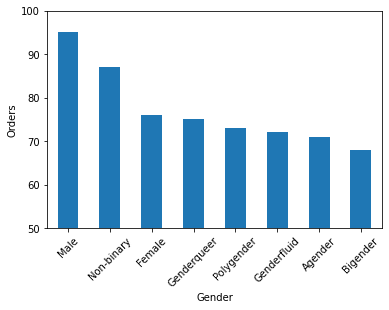

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df_gen["gender"].value_counts().plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Orders")
plt.ylim(50,100)
plt.xticks(rotation=45)

*We can infer that Bigender customers have placed the least amount of orders.*

*In addition to that; The number of orders placed by Female customers are lesser than the orders placed by Male Customers.*

***We can boost their sales by creating a range of popular products based on a color palette that tenders to both of their needs.***

In [ ]:
df_bi=df_gen[df_gen["gender"]=="Bigender"]
df_bi["product_name"].value_counts()

Denim              8
Polo               7
Windbreaker        6
Oxford Cloth       5
Parka              4
Camp Collared      3
Chambray           3
Dress              3
Cardigan           3
Chinos             3
Linen              2
Drawstring         2
Shearling          2
Henley             2
Casual Slim Fit    2
Flannel            2
Leather            2
Bomber             2
Cords              1
Puffer             1
Pullover           1
Coach              1
Mandarin Collar    1
Cuban Collar       1
Slim-Fit           1
Name: product_name, dtype: int64

In [ ]:
df_bi["colour"].value_counts()

violet    14
red       12
orange    12
yellow     8
indigo     8
green      8
blue       6
Name: colour, dtype: int64

Among the Bigender customers, **Violet and Denim** seem to be popular themes.

In [ ]:
df_fem=df_gen[df_gen["gender"]=="Female"]
df_fem["product_name"].value_counts()

Denim              6
Flannel            5
Camp Collared      5
Coach              5
Puffer             4
Peacoat            4
Chambray           4
Bomber             4
Oxford Cloth       3
Dress              3
Windbreaker        3
Henley             3
Polo               3
Linen              3
Wool               3
Leather            2
Cuban Collar       2
Pullover           2
Shearling          2
Drawstring         2
Slim-Fit           2
Casual Slim Fit    1
Mandarin Collar    1
Cardigan           1
Trench Coat        1
Chinos             1
Cords              1
Name: product_name, dtype: int64

In [ ]:
df_fem["colour"].value_counts()

indigo    15
yellow    15
green     13
orange    11
violet     9
red        7
blue       6
Name: colour, dtype: int64

Among the Bigender customers, **Indigo and Denim** seem to be popular themes.

**We can therefore create a new Denim range of Indigo/Violet products to attract more Female and Bigender customers!**

In [ ]:
from IPython.display import Image
Image(url="https://sosoclothing.se/wp-content/uploads/2021/09/IMG_20210906_131131_566-600x600.jpg", width=250, height=250)

In [ ]:
df["sales"] = df["price"] * df["quantity"]
df.head()

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,...,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,...,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,...,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",6156
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,...,2021-05-19,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt",7866
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,...,2021-03-24,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt",5358


**Univariate Analysis to deduce if the data has a normal distribution**.

In [ ]:
def univariate_analysis(data, color, title1):
    
    sns.distplot( # create a distplot visualization
        data, # data
         # axes 1
        kde=True, # kde
        color=color # color
    )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


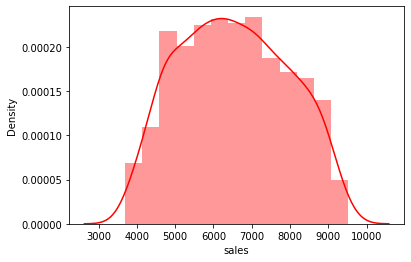

In [ ]:

univariate_analysis( # call the function
    data=df['sales'], # put the data
    color='red', # pick the color
    title1='COP Data - Sales Data Distribution')

***Using Chebyshev's Theorem to find the inter-quartile ranges.***

In [ ]:
import math
df1=df[["sales","age","price","quantity"]].copy()
print("Using Chebyshev's Theorem,")
for x in df1.columns:
  mean1=df1[x].mean()
  std1=df1[x].std()
  low_lim=mean1-2*(std1).round(0)
  upper_lim=mean1+2*(std1).round(0)
  print("At least 75% of the Retail customer population in Australia has {} ranging from {} - {} (Australian Dollars).".format(x,low_lim,upper_lim))


Using Chebyshev's Theorem,
At least 75% of the Retail customer population in Australia has sales ranging from 3714.937 - 9350.937 (Australian Dollars).
At least 75% of the Retail customer population in Australia has age ranging from 13.86 - 85.86 (Australian Dollars).
At least 75% of the Retail customer population in Australia has price ranging from 90.095 - 126.095 (Australian Dollars).
At least 75% of the Retail customer population in Australia has quantity ranging from 36.371 - 84.37100000000001 (Australian Dollars).


**Question 2:** What is the most popular clothing item per month? Does it match with the seasonal clothing preferences?

In [ ]:
months=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep"]
clothes=pd.DataFrame(months,columns=["Month"])
list1=[]
for i in months:
  list1.append(df2[df2["order_date"]==i]["product_name"].value_counts().index.tolist()[0])
clothes['Popular Product'] = list1
clothes

,Month,Popular Product
0,Jan,Denim
1,Feb,Denim
2,Mar,Denim
3,Apr,Denim
4,May,Oxford Cloth
5,Jun,Flannel
6,Jul,Windbreaker
7,Aug,Cardigan
8,Sep,Chinos


**Queestion 3:** The Marketing team wishes to publicize the company by guaranteeing a "10 Day Shipping Period" for all the orders placed. Does this correspond with the data? If not how could we improve the situation.

In [ ]:
delivery=df[["city","state","order_date","delivery_date"]].copy()
import datetime
delivery[["order_date", "delivery_date"]] = delivery[["order_date", "delivery_date"]].apply(pd.to_datetime)
delivery["Time Taken in Days"]=delivery["order_date"] - delivery["delivery_date"]
delivery["Time Taken in Days"]=delivery["Time Taken in Days"].abs()
delivery["Time Taken in Days"] = pd.to_numeric(delivery["Time Taken in Days"].dt.days, downcast='integer')
delivery.head()

,city,state,order_date,delivery_date,Time Taken in Days
0,Johnstonhaven,Northern Territory,2021-08-30,2021-09-24,25
1,New Zacharyfort,South Australia,2021-02-03,2021-02-13,10
2,Aliburgh,Australian Capital Territory,2021-10-08,2021-11-03,26
3,South Justinhaven,Queensland,2021-05-06,2021-05-19,13
4,Griffithsshire,Queensland,2021-03-23,2021-03-24,1


In [ ]:
delivery["Time Taken in Days"].mean()

14.078

In [ ]:
delivery["Time Taken in Days"].median()

14.0

***The Mean and Median are almost the same, hence we can assume there are no outliers in the data.***

The average delivery period is 14 days and not 10 days, hence it would not be ethical to market the claim.

We can improve this situation by setting up delivery stations in areas where the ***Time Taken*** and ***Quantity*** of orders are more.

In [ ]:
delivery[delivery["Time Taken in Days"]>=10]["state"].value_counts()

Queensland                      93
New South Wales                 90
South Australia                 89
Northern Territory              87
Australian Capital Territory    87
Victoria                        82
Western Australia               80
Tasmania                        70
Name: state, dtype: int64

In [ ]:
state_data=df.loc[df["quantity"]==df["quantity"].max()]
state_data["state"].value_counts()

South Australia                 4
Tasmania                        4
Victoria                        3
Australian Capital Territory    3
New South Wales                 2
Northern Territory              1
Queensland                      1
Western Australia               1
Name: state, dtype: int64

In [ ]:
city=df[df["state"]=="South Australia"]
city["city"].value_counts()

West Kai            2
Port Isabelle       2
New Angelina        1
New Emmastad        1
Port Zaraberg       1
                   ..
South Jayden        1
South Pipermouth    1
New Sienna          1
Johntown            1
Glovershire         1
Name: city, Length: 137, dtype: int64

**Question 4:** An In-Store Shop wishes to set up mannequins clothed in Male and Female clothes to increase sales. Find out the best and economically profitable combination of clothes to do so.

In [ ]:
df["product_type"].unique()

array(['Shirt', 'Jacket', 'Trousers'], dtype=object)

In [ ]:
df["order_date"]=df["order_date"].str[5:6]
df["order_date"]=df["order_date"].astype(int)
df["order_date"] = df['order_date'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
jacket=df[(df["product_type"]=="Jacket") & (df["gender"]=="Female") & (df["order_date"]=="Sep")]
jacket_f=jacket["product_name"].value_counts().index.tolist()[0]
jacket_f

shirt=df[(df["product_type"]=="Shirt") & (df["gender"]=="Female") & (df["order_date"]=="Sep")]
shirt_f=shirt["product_name"].value_counts().index.tolist()[2]
shirt_f

trousers=df[(df["product_type"]=="Trousers") & (df["gender"]=="Female") & (df["order_date"]=="Sep")]
trousers_f=trousers["product_name"].value_counts().index.tolist()[0]
trousers_f

print("The ideal combo for a female mannequin: ")
print("Jacket: {}\n Shirt: {}\n Trousers: {}".format(jacket_f,shirt_f,trousers_f))
from IPython.display import Image
Image(url="https://i.styleoholic.com/2020/02/With-beige-shirt-black-cropped-pants-and-lace-up-high-heels.jpg", width=250, height=250)

The ideal combo for a female mannequin: 
Jacket: Leather
 Shirt: Camp Collared
 Trousers: Drawstring


In [ ]:
jacket=df[(df["product_type"]=="Jacket") & (df["gender"]=="Male")  & (df["order_date"]=="Sep")]
jacket_m=jacket["product_name"].value_counts().index.tolist()[0]
jacket_m

shirt=df[(df["product_type"]=="Shirt") & (df["gender"]=="Male")  & (df["order_date"]=="Sep")]
shirt_m=shirt["product_name"].value_counts().index.tolist()[4]
shirt_m

trousers=df[(df["product_type"]=="Trousers") & (df["gender"]=="Male")  & (df["order_date"]=="Sep")]
trousers_m=trousers["product_name"].value_counts().index.tolist()[0]
trousers_m

print("The ideal combo for a male mannequin: ")
print("Jacket: {}\n Shirt: {}\n Trousers: {}".format(jacket_m,shirt_m,trousers_m))
from IPython.display import Image
Image(url="https://world.benetton.com/on/demandware.static/-/Sites-ucb-master/default/dwb75a226d/images/Full_Card_h/Benetton_22P_5VKD5QMI8_905_FY_Full_Card_h.jpg", width=250, height=250)

The ideal combo for a male mannequin: 
Jacket: Cardigan
 Shirt: Mandarin Collar
 Trousers: Chinos


**Question 5**: Corporate wishes to implement a scheme offering Senior Citizens above the age of 60; over 5% discount on all clothing. Predict the margin by which it will affect sales in the month of October.

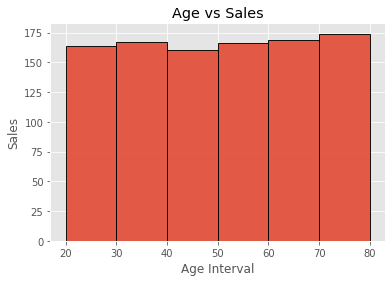

In [ ]:
bins=[20,30,40,50,60,70,80]
plt.hist(df["age"], bins, alpha=0.9, edgecolor='k', linewidth=1)
plt.title("Age vs Sales")
plt.xlabel("Age Interval")
plt.ylabel("Sales")
plt.show()

In [ ]:
df3["sales"]=df3["price"]*df3["quantity"]
df3["order_date"]=df3["order_date"].str[5:6]
df3["order_date"]=df3["order_date"].astype(int)
sales_df=df3[["sales","order_date"]].copy()
sales_df=sales_df.groupby('order_date')['sales'].sum().reset_index()
sales_df

,order_date,sales
0,1,1251675
1,2,611133
2,3,759620
3,4,653023
4,5,552995
5,6,658699
6,7,706053
7,8,688716
8,9,651023


In [ ]:
from statistics import mean
import numpy as np

xs = sales_df["order_date"]
ys = sales_df["sales"]

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

-37855.28333333332 915158.3055555555


In [ ]:
regression_line = [(m*x)+b for x in xs]

In [ ]:
regression_line = []
for x in xs:
    regression_line.append((m*x)+b)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

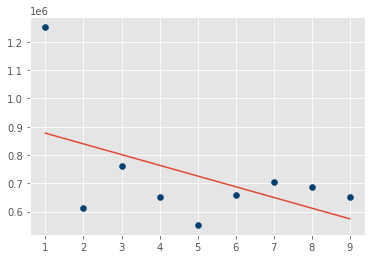

In [ ]:
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

In [ ]:
predict_x = 10

In [ ]:
predict_y = (m*predict_x)+b
print(predict_y)

536605.4722222222


In [ ]:
print("The final sales after discount $",(((95/100))*predict_y))

The final sales after discount $ 509775.1986111111


# **The Employee Churn Dataset**

***Question: What factor or factors cause an employee to leave his/her company?***

The "ML" way

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])
df

In [ ]:
df.info()

In [ ]:
X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

In [ ]:
forest.score(X_train, Y_train)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()

In [ ]:
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [ ]:
importances.plot.bar()

***Our Way....The Simple Way***

In [ ]:
list1=[]
list2=[]
for i in df.columns:
  score=df['Attrition'].corr(df[i],method='kendall')
  list1.append(i)
  list2.append(score)
df1 = pd.DataFrame(list(zip(list1, list2)),columns =['Name', 'Correlation'])
df1 = df1.drop(df.index[[8,21,26,1]])
df1.head()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Plotting the Correlation b/w Attrition')
ax.set_xlabel('Factors')
ax.set_ylabel('Correlation')
plt.bar(df1["Name"], df1["Correlation"], color=['r' if v < 0 else 'g' for v in df1["Correlation"]])
plt.ylim(-1, 1)
plt.xticks(rotation=90)

legend_handles = [Line2D([0], [0], linewidth=0, marker='o', markerfacecolor=color, markersize=12, markeredgecolor='none')
                  for color in ['g', 'r']]
ax.legend(legend_handles, ['+ve Correlation', '-ve Correlation'])
plt.show()